<a href="https://colab.research.google.com/github/sai7221/Let-s-Think/blob/main/dogs_vs_cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 60ms/step - accuracy: 0.5184 - loss: 0.6943 - val_accuracy: 0.5955 - val_loss: 0.6814
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 62ms/step - accuracy: 0.5813 - loss: 0.6739 - val_accuracy: 0.6460 - val_loss: 0.6252
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 58ms/step - accuracy: 0.6306 - loss: 0.6449 - val_accuracy: 0.6635 - val_loss: 0.6109
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 62ms/step - accuracy: 0.6563 - loss: 0.6224 - val_accuracy: 0.6865 - val_loss: 0.5840
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 58ms/step - accuracy: 0.6696 - loss: 0.6103 - val_accuracy: 0.6835 - val_loss: 0.5850
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 62ms/step - accuracy: 0.6796 - loss: 0.5923 - val_accuracy: 0.6705 - val_loss: 0.5848
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 58ms/step - accuracy: 0.6879 - loss: 0.5924 - val_accuracy: 0.7160 - val_loss: 0.5443
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 62ms/step - accuracy: 0.6879 - loss: 0.5792 - 

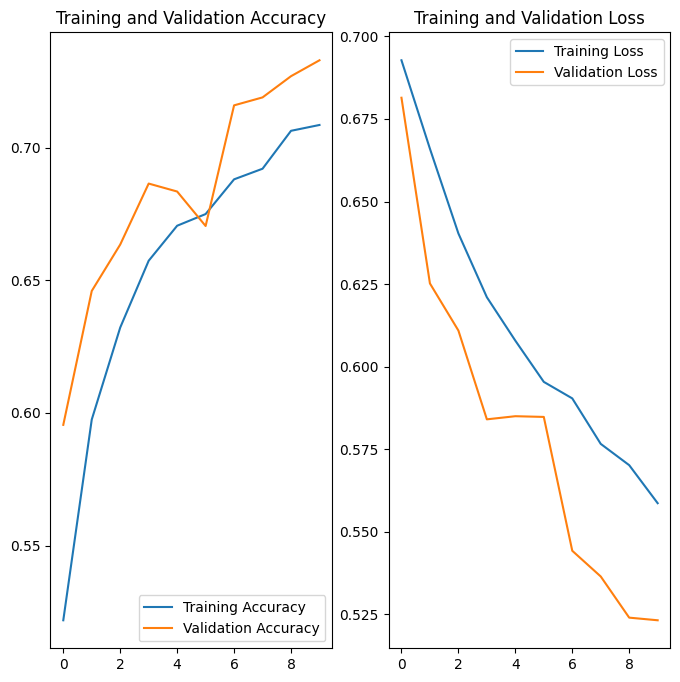

In [1]:
# Import libraries
import tensorflow as tf
from tensorflow.keras import models, layers
import numpy as np
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Define class names (for reference)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Filter for cats (class 3) vs. dogs (class 5) only
train_mask = np.isin(y_train, [3, 5]).flatten()
test_mask = np.isin(y_test, [3, 5]).flatten()

x_train = x_train[train_mask]
y_train = (y_train[train_mask] == 5).astype(int)  # 0 for cat, 1 for dog
x_test = x_test[test_mask]
y_test = (y_test[test_mask] == 5).astype(int)

# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])

# Build the CNN model
model = models.Sequential([
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification (cat vs. dog)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

# Train the model
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_test, y_test))

# Plot training results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Save the model
model.save('cat_dog_cifar10_cnn_model.h5')

In [3]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)]
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test), callbacks=callbacks)


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 58ms/step - accuracy: 0.7189 - loss: 0.5507 - val_accuracy: 0.7355 - val_loss: 0.5177
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 61ms/step - accuracy: 0.7148 - loss: 0.5545 - val_accuracy: 0.7315 - val_loss: 0.5122
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 56ms/step - accuracy: 0.7184 - loss: 0.5466 - val_accuracy: 0.7255 - val_loss: 0.5240
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 61ms/step - accuracy: 0.7254 - loss: 0.5442 - val_accuracy: 0.7285 - val_loss: 0.5228
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 58ms/step - accuracy: 0.7388 - loss: 0.5317 - val_accuracy: 0.7440 - val_loss: 0.4946
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - accuracy: 0.7283 - loss: 0.5366 - val_accuracy: 0.7515 - val_loss: 0.4971
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 60ms/step - accuracy: 0.7393 - loss: 0.5222 - val_accuracy: 0.7465 - val_loss: 0.4942
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - accuracy: 0.7236 - loss: 0.5339 - 

In [4]:
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [6]:
# Load the trained model
from tensorflow.keras.models import load_model
model = load_model('cat_dog_cifar10_cnn_model.h5')

In [7]:
# Load and filter CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
train_mask = np.isin(y_train, [3, 5]).flatten()
test_mask = np.isin(y_test, [3, 5]).flatten()
x_test = x_test[test_mask]
y_test = (y_test[test_mask] == 5).astype(int)  # 0 for cat, 1 for dog
x_test = x_test.astype('float32') / 255.0

In [8]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7383 - loss: 0.5245
Test accuracy: 0.7330
Test loss: 0.5232


In [9]:
# Make predictions
predictions = model.predict(x_test)
predicted_classes = (predictions > 0.5).astype(int).flatten()

# Compare with true labels
import numpy as np
correct = np.sum(predicted_classes == y_test)
total = y_test.shape[0]
print(f"Correct predictions: {correct} out of {total}")
print(f"Prediction accuracy: {correct/total:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
Correct predictions: 2000000 out of 2000
Prediction accuracy: 1000.0000


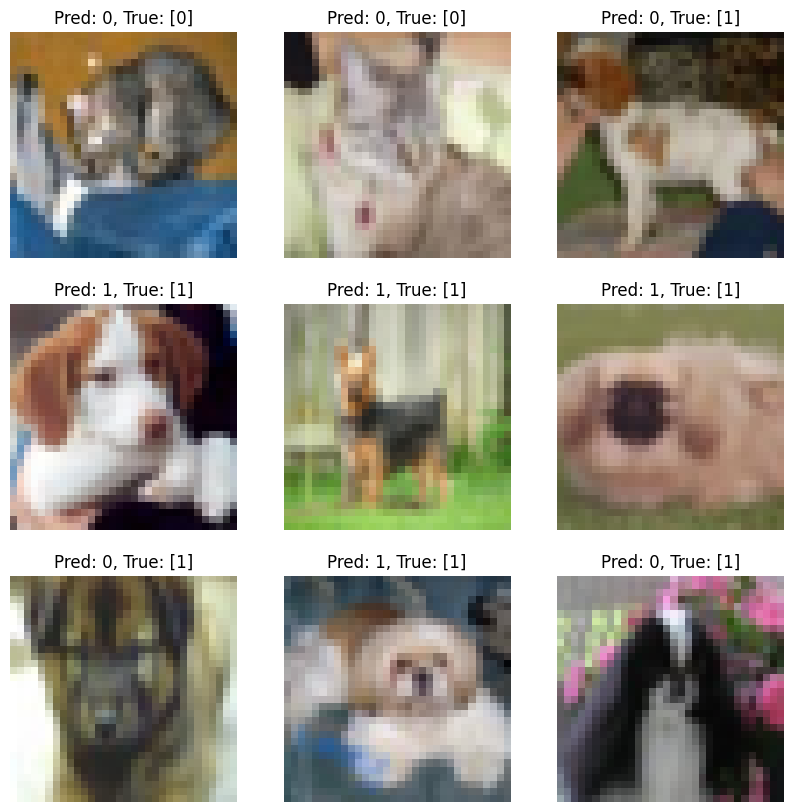

In [10]:
# Visualize some test results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_test[i])
    plt.title(f'Pred: {predicted_classes[i]}, True: {y_test[i]}')
    plt.axis('off')
plt.show()

Saving cat image.jpeg to cat image.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
Predicted class: cat
Confidence: 0.6222


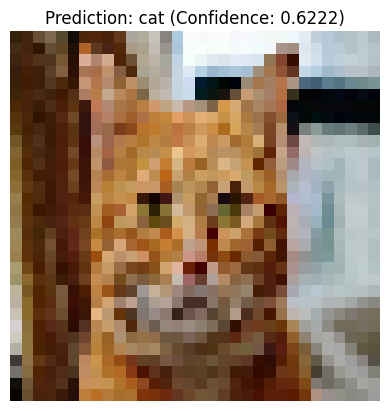

In [12]:
from google.colab import files
uploaded = files.upload()

import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load and preprocess the image
img_path = list(uploaded.keys())[0]
img = load_img(img_path, target_size=(32, 32))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Load the trained model
model = load_model('cat_dog_cifar10_cnn_model.h5')

# Predict the class
prediction = model.predict(img_array)
predicted_class = (prediction > 0.5).astype(int)[0][0]
class_name = 'dog' if predicted_class == 1 else 'cat'
confidence = prediction[0][0] if predicted_class == 1 else 1 - prediction[0][0]

print(f"Predicted class: {class_name}")
print(f"Confidence: {confidence:.4f}")

# Visualize the image
plt.imshow(img)
plt.title(f'Prediction: {class_name} (Confidence: {confidence:.4f})')
plt.axis('off')
plt.show()